In [2]:
from collections import Counter
from numpy.random import uniform
from shapely.geometry import Point, shape
import shapefile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import networkx as nx


# Read in the data
df = pd.read_csv('uspower.csv')
# 随机为每个节点添加位于美国本土的经纬度,且不超过陆地范围
# # 规定美国本土的多边形
# us_shape = shapefile.Reader('cb_2017_us_nation_5m.shp')
# # 读取美国本土的多边形
# us_shape_records = us_shape.shapeRecords()
# # 生成多边形
# us_polygons = [shape(s.shape) for s in us_shape_records]
# # 生成点
# points = []
# for i in range(len(df)):
#     # 生成随机点
#     point = Point(uniform(-124.848974, -66.885444), uniform(24.396308, 49.384358))
#     # 判断点是否在多边形内
#     while not any([point.within(polygon) for polygon in us_polygons]):
#         point = Point(uniform(-124.848974, -66.885444), uniform(24.396308, 49.384358))
#     points.append(point)
# # 生成经纬度
# df['latitude'] = [p.y for p in points]
# df['longitude'] = [p.x for p in points]

#创建一个包含经度纬度的列
# df['lonlat'] = list(zip(df.longitude, df.latitude))
# #保存到uspower.csv
# df.to_csv('uspower.csv', index=False)

# 读取边列表工作簿1.xlsx
df1 = pd.read_excel('工作簿1.xlsx')
# df1转化为networkx的图对象
G = nx.from_pandas_edgelist(df1, 'source', 'target')





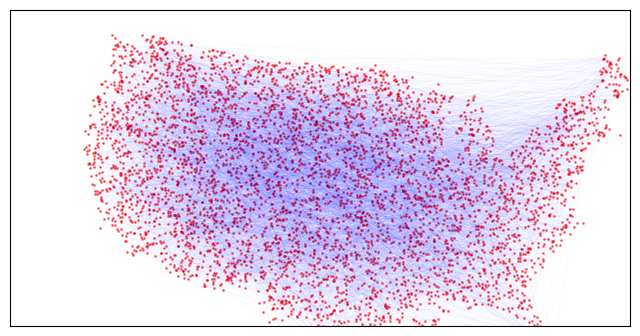

In [4]:
# 可视化地理位置
# 读取uspower.csv
from mpl_toolkits.basemap import Basemap
from collections import Counter
from numpy.random import uniform
from shapely.geometry import Point, shape
import shapefile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

df = pd.read_csv('uspower.csv')
# 创建一个新的图形
plt.figure(figsize=(8, 6))
# 绘制美国地图
m = Basemap(llcrnrlon=-125, llcrnrlat=25, urcrnrlon=-65, urcrnrlat=50, projection='lcc', lat_1=32, lat_2=45, lon_0=-95)
# # 画出州界
# m.drawstates(color='gray')
# # 画出海岸线
# m.drawcoastlines(color='gray')
# # 画出国界
# m.drawcountries(color='gray')
# 画出经纬度
# m.drawparallels(np.arange(10, 70, 10), labels=[1, 0, 0, 0])
# m.drawmeridians(np.arange(-180, -40, 20), labels=[0, 0, 0, 1])
# 画出节点
m.scatter(df['longitude'], df['latitude'], latlon=True, s=1, alpha=0.5, c='r')

#画出边
for i in range(df1.shape[0]):
    #获取两个节点的经纬度
    lon1, lat1 = df.loc[df['Id'] == df1.iloc[i]['source']][['longitude', 'latitude']].values[0]
    lon2, lat2 = df.loc[df['Id'] == df1.iloc[i]['target']][['longitude', 'latitude']].values[0]
    #画出边
    m.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=0.01, color='b',del_s=1)
plt.savefig('uspower.svg', dpi=300)
# for i in range(df1.shape[0]):
#     # 获取两个节点的经纬度
#     lon1, lat1 = df.loc[df['Id'] == df1.iloc[i]['source']][['longitude', 'latitude']].values[0]
#     lon2, lat2 = df.loc[df['Id'] == df1.iloc[i]['target']][['longitude', 'latitude']].values[0]
#     # 画出边
#     m.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=0.5, color='b')
